# Customer Segmentation using K-Means

## Import libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'white')

## Data Collection and Analysis

In [53]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [54]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### if spending_score is near to 100 then the customer purchases more and if it is less then purchase is less

## Viewing and describing the data

In [55]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [57]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

####  So, our dataset has 5 columns named:

####  1.CustomerID
####  2.Gender
####  3.Age
####  4.Annual Income (k$)
####  5.Spending Score (1-100).

In [58]:
customer_data.shape

(200, 5)

In [59]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [61]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### there are no missing value
##### we mainly focus on the annual income and spending score features for training the model

## Data Cleaning

In [62]:
customer_data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


##### The 'customer_id' column has no relevence therefore deleting it would be better.

In [63]:
customer_data = customer_data.drop('CustomerID', axis=1)
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [64]:
customer_data = customer_data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
customer_data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


##### As the data has no missing value, it is clean and we can proceed for the further steps 

## Understanding and Visualizing the data

In [65]:
corr = customer_data.corr(method='pearson', numeric_only = True)
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


##### plotting the heat map for the correlation

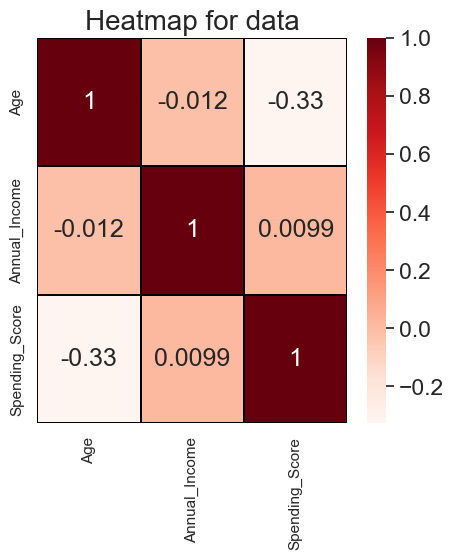

In [66]:
fig, ax = plt.subplots(figsize = (5,5))
sns.set(font_scale = 1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidth = 0.3, linecolor = 'black')
plt.title("Heatmap for data", fontsize = 20)
plt.show()

### Distribution of annual income

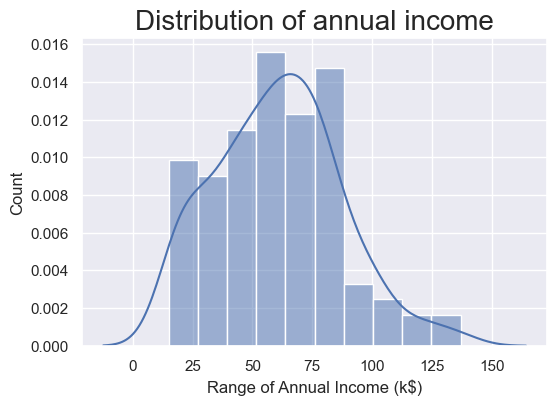

In [67]:
plt.figure(figsize = (6,4))
sns.set(style = 'darkgrid')
#sns.distplot(customer_data['Annual_Income'])
sns.histplot(customer_data['Annual_Income'], kde=True, stat = 'density', kde_kws = dict(cut=3))
plt.title("Distribution of annual income", fontsize = 20)
plt.xlabel("Range of Annual Income (k$)")
plt.ylabel("Count")
plt.show()

### Distribution of age

Text(0, 0.5, 'Count')

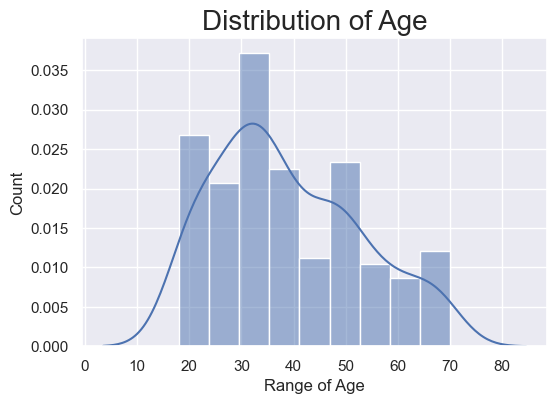

In [68]:
#Distribution of age
plt.figure(figsize=(6, 4))
sns.set(style = 'darkgrid')
sns.histplot(customer_data['Age'], kde = True, stat = 'density', kde_kws = dict(cut=3))
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

### Distribution of spending score

Text(0, 0.5, 'Count')

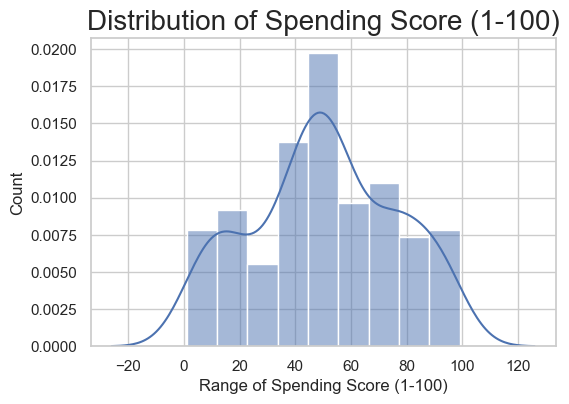

In [69]:
plt.figure(figsize=(6, 4))
sns.set(style = 'whitegrid')
sns.histplot(customer_data['Spending_Score'], kde = True, stat = 'density', kde_kws = dict(cut = 3))
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

### Visualizing the customers based on gender

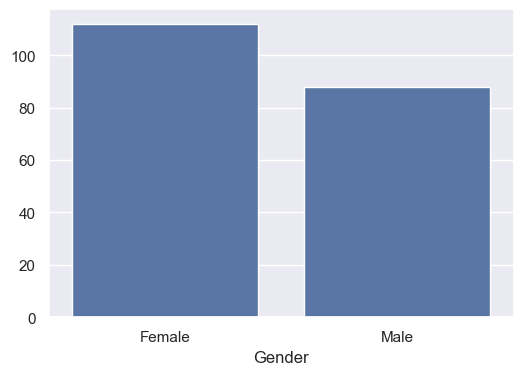

In [70]:
gender = customer_data.Gender.value_counts()
sns.set(style = 'darkgrid')
plt.figure(figsize = (6,4))
sns.barplot(x = gender.index, y = gender.values)
plt.show()

## Extracting the essential features

In [71]:
X = customer_data.iloc[:, [2,3]].values

In [72]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Scatter plot of input data

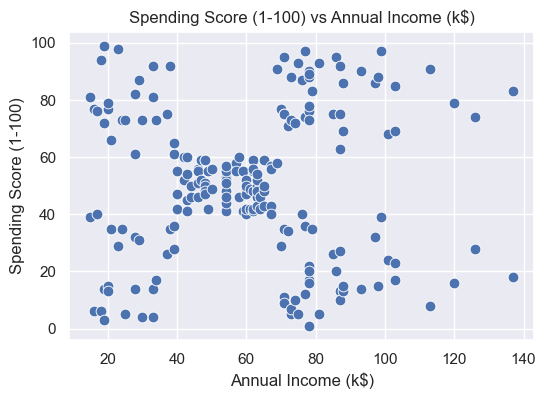

In [73]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Annual_Income',y = 'Spending_Score',  data = customer_data[["Annual_Income","Spending_Score"]]  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Choosing optimal number of clusters

##### Parameter 'wcss' represents within cluster, sum of squares. It determines the distance between each data point and their centroid. It is important while choosing the optimal number of clusters

##### for a good cluster we have the data points close to the centroid

In [74]:
#finding the wcss value for different clusters. Let the number of clusters be 10
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

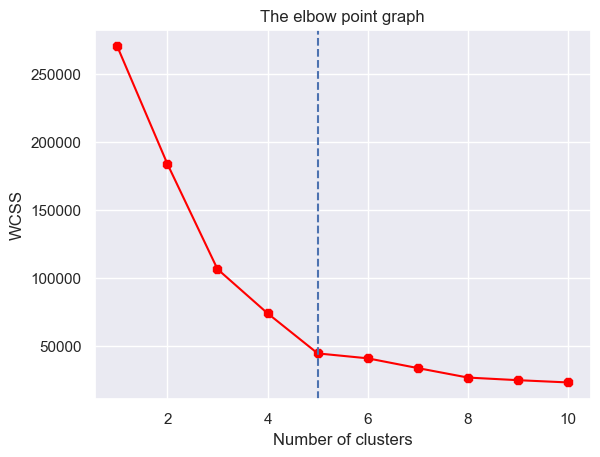

In [87]:
#plotting elbow graph to findwhich cluter has minimum wcss value
sns.set()
plt.plot(range(1,11), wcss, color='red', marker = '8')
plt.axvline(x=5, ls='--')
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

##### We consider 2 points here. one is x = 3 and other is x = 5 where we have significant change in WCSS value. We consider x = 5 because after 5 there is no significant drop in the WCSS value. Thus number of clusters can be taken as 5
#### The optimal number of clusters varies across datasets

#### Optimal number of clusters = 5

## Training the Model

In [76]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 0)

#return label for each cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


##### we are adding a new column label to indicate the cluster in which the data point falls into

In [77]:
customer_data['label'] = Y

In [78]:
customer_data

,Gender,Age,Annual_Income,Spending_Score,label
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


#### 5 clusters - 0,1,2,3,4

## Visualizing all the clusters

In [79]:
### Scatterplot of the clusters

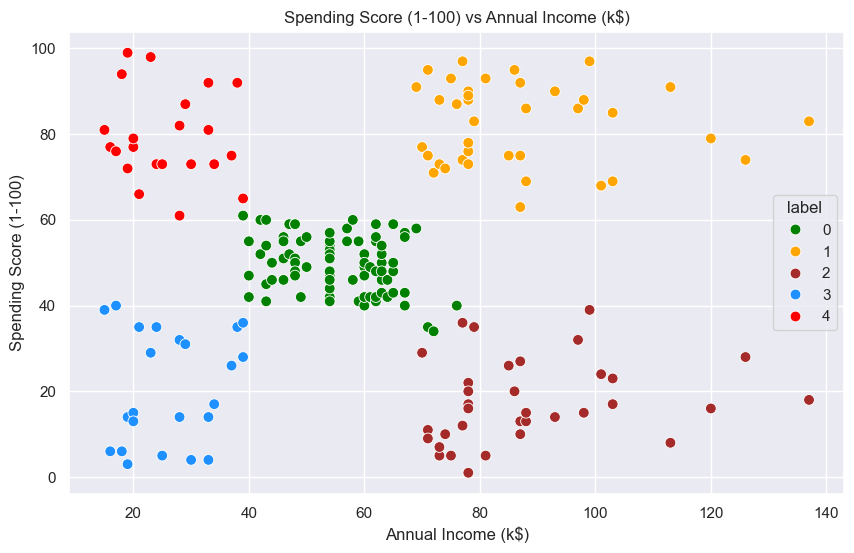

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_Income',y = 'Spending_Score', hue = 'label',
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = customer_data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#### Ploting the clusters and their centroids

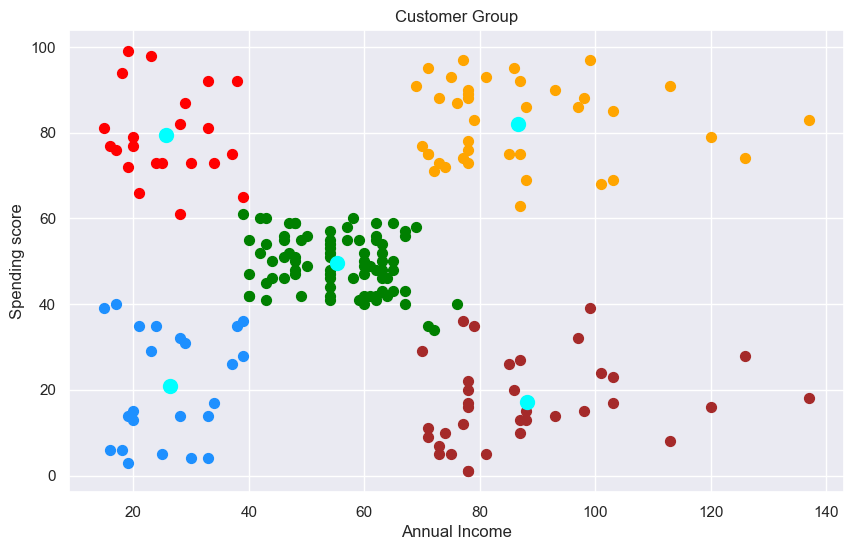

In [81]:
plt.figure(figsize=(10,6))   #figsize=(8,8) -> size of the figure
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='brown', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='dodgerblue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='red', label='Cluster 5')
# X[Y==0,0]->x coordinate of the data point
# X[Y==0,1]->y coordinate of the data point

#centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
#kmeans.cluster_centers_[:,0]->x axis value of centroid
#kmeans.cluster_centers_[:,1]->y axis value of centroid

plt.title("Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

#### Centroids of clusters

In [82]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

#### Number of data points in each cluster

In [83]:
cust1=customer_data[customer_data["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print("--------------------------------------------")
cust2=customer_data[customer_data["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print("--------------------------------------------")
cust3=customer_data[customer_data["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print("--------------------------------------------")
cust4=customer_data[customer_data["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print("--------------------------------------------")
cust5=customer_data[customer_data["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print("--------------------------------------------")

Number of customer in 1st group= 81
--------------------------------------------
Number of customer in 2nd group= 39
--------------------------------------------
Number of customer in 3rd group= 35
--------------------------------------------
Number of customer in 4th group= 23
--------------------------------------------
Number of customer in 5th group= 22
--------------------------------------------


## Analysis

In [84]:
clusters = customer_data[['Annual_Income', 'Spending_Score', 'label']]
clusters

,Annual_Income,Spending_Score,label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


### Visualizing Individual clusters

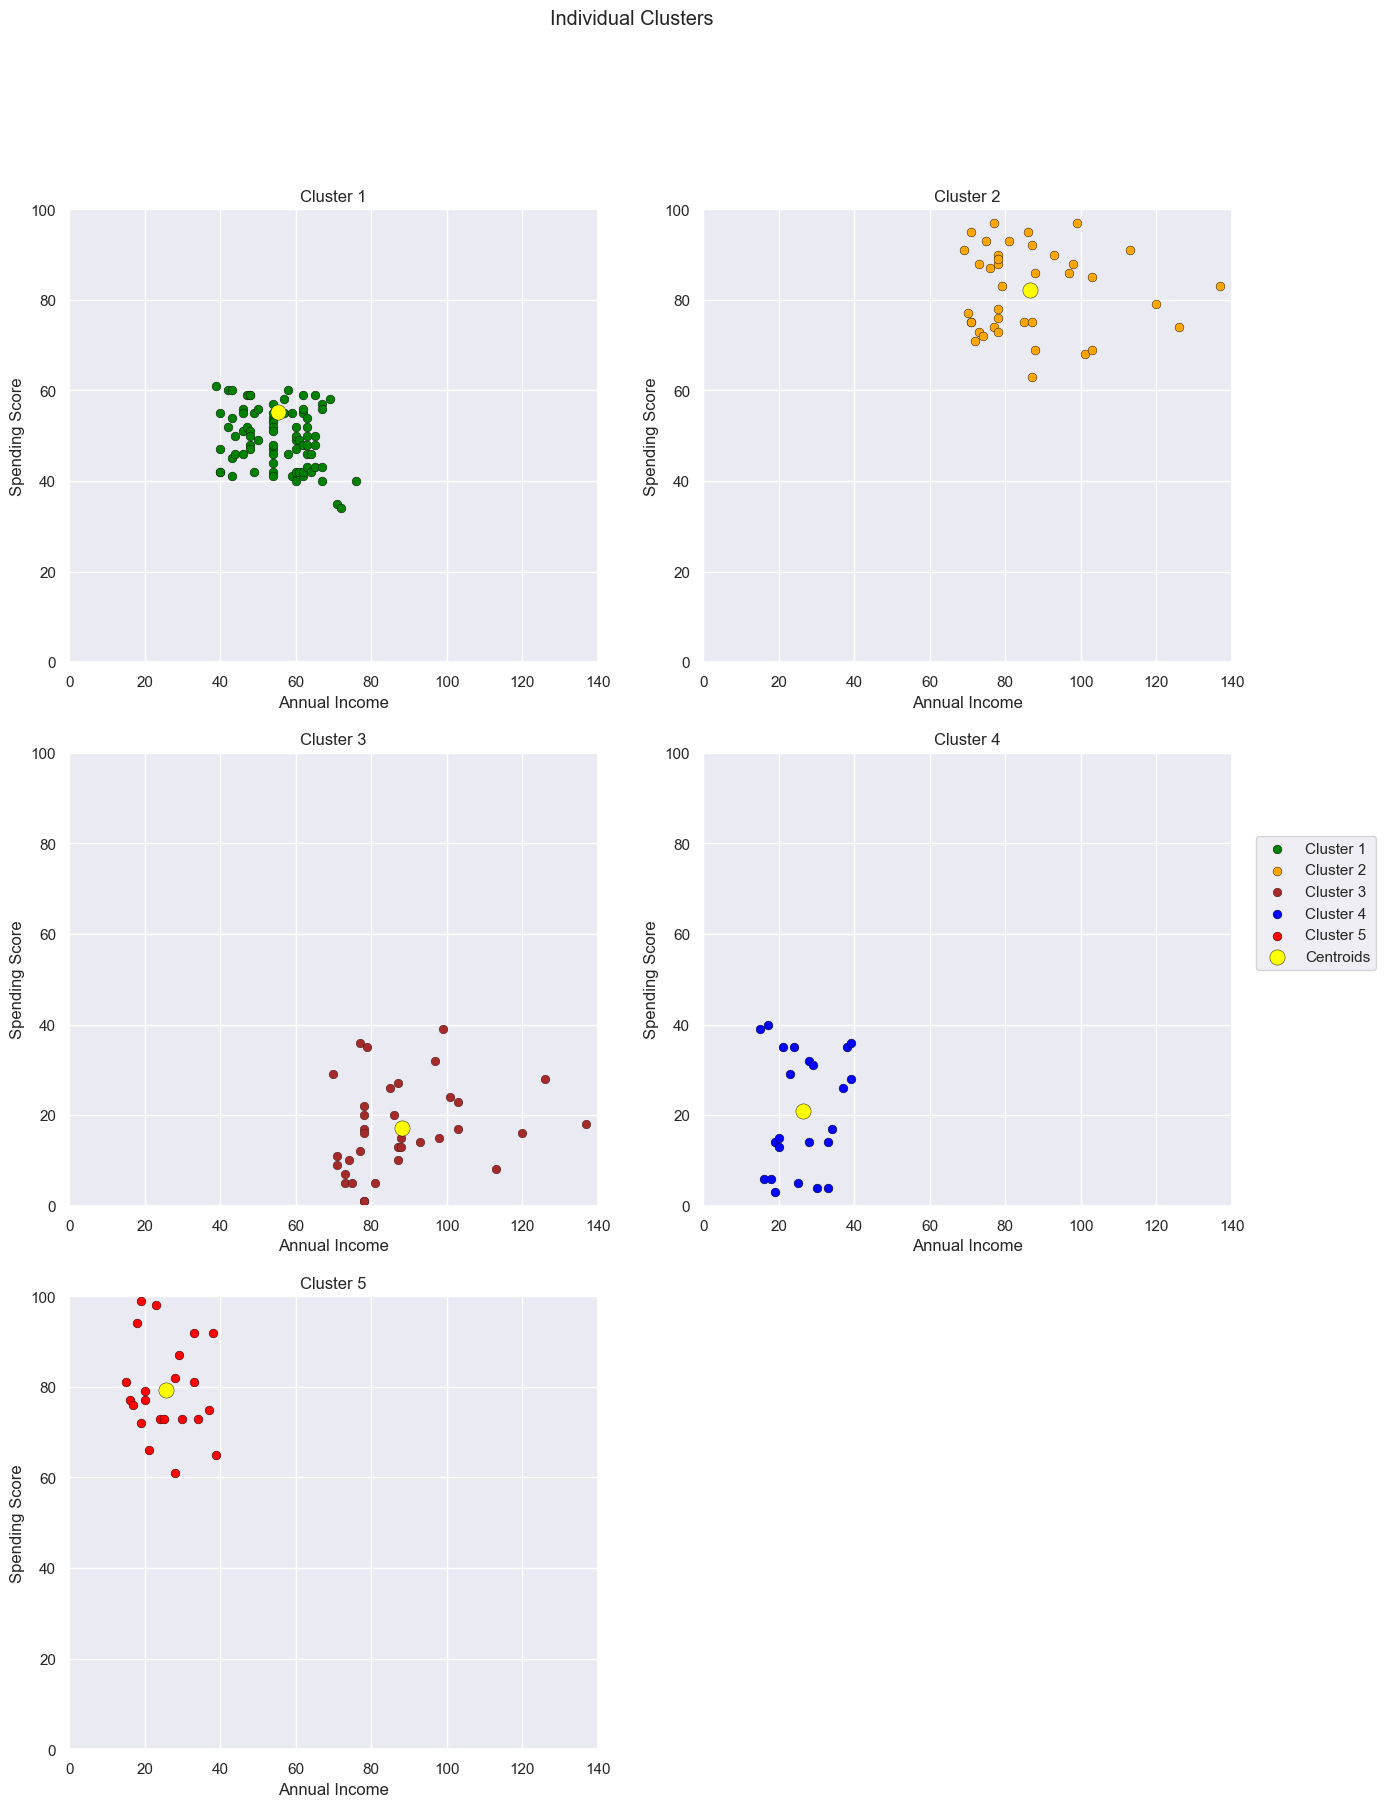

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))

ax[0,0].scatter(x=clusters[clusters['label'] == 0]['Annual_Income'],
            y=clusters[clusters['label'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='green', label='Cluster 1')
ax[0,0].scatter(x=kmeans.cluster_centers_[0,0], y=kmeans.cluster_centers_[0,0],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['label'] == 1]['Annual_Income'],
            y=clusters[clusters['label'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 2')
ax[0,1].scatter(x=kmeans.cluster_centers_[1,0], y=kmeans.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['label'] == 2]['Annual_Income'],
            y=clusters[clusters['label'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='brown', label='Cluster 3')
ax[1,0].scatter(x=kmeans.cluster_centers_[2,0], y=kmeans.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['label'] == 3]['Annual_Income'],
            y=clusters[clusters['label'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='blue', label='Cluster 4')
ax[1,1].scatter(x=kmeans.cluster_centers_[3,0], y=kmeans.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['label'] == 4]['Annual_Income'],
            y=clusters[clusters['label'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 5')
ax[2,0].scatter(x=kmeans.cluster_centers_[4,0], y=kmeans.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

### Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,
#### 1. Cluster Green 
#### 2. Cluster Orange 
#### 3. Cluster Brown 
#### 4. Cluster Blue 
#### 5. Cluster Red


### 1. Cluster Green - Spenders :

##### This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

### 2. Cluster Orange - Target Customers :

##### Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

### 3. Cluster Brown - Balanced Customers :

##### They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

### 4. Cluster Blue - Pinch Penny Customers :

##### Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

### 5. Cluster Red - Normal Customer :

##### Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.